In [2]:
import altair as alt
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
import pandas as pd
movies_data = pd.read_json("lab2-movies.json")
movies_data

,id,title,runtime,budget,revenue,vote_average,vote_count,genres,studios
0,12,Finding Nemo,100,94000000,940335536,3.86,33887,[Animation],[Pixar Animation Studios]
1,13,Forrest Gump,142,55000000,677945399,4.05,91921,"[Romance, Comedy, Drama]",[Paramount Pictures]
2,14,American Beauty,122,15000000,356296601,4.13,57879,[Drama],[DreamWorks SKG]
3,16,Dancer in the Dark,140,12800000,40031879,3.84,4571,[Drama],[Canal+]
4,22,Pirates of the Caribbean: The Curse of the Bla...,143,140000000,655011224,3.81,36337,[Action],[Walt Disney Pictures]
...,...,...,...,...,...,...,...,...,...
1003,376290,Miss Sloane,132,13000000,3500605,3.63,89,[Drama],[Canal+]
1004,384682,Office Christmas Party,105,45000000,114501299,3.00,124,[Comedy],"[DreamWorks SKG, Paramount Pictures]"
1005,393457,Fences,139,24000000,64414761,3.50,262,[Drama],[Paramount Pictures]
1006,393519,Raw,99,3500000,4100000,3.48,74,"[Horror, Drama]",[Canal+]


In [3]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1008 non-null   int64  
 1   title         1008 non-null   object 
 2   runtime       1008 non-null   int64  
 3   budget        1008 non-null   int64  
 4   revenue       1008 non-null   int64  
 5   vote_average  1008 non-null   float64
 6   vote_count    1008 non-null   int64  
 7   genres        1008 non-null   object 
 8   studios       1008 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 78.8+ KB


In [4]:
movies_data.describe()

,id,runtime,budget,revenue,vote_average,vote_count
count,1008.000000,1008.000000,1.008000e+03,1.008000e+03,1008.000000,1008.000000
mean,49888.699405,112.183532,5.940012e+07,1.878759e+08,3.240198,6907.056548
std,88325.959056,21.527725,5.525947e+07,2.449621e+08,0.471919,10794.341581
min,12.000000,63.000000,5.000000e+00,8.500000e+01,1.610000,11.000000
25%,3627.000000,96.000000,2.000000e+07,4.127994e+07,2.947500,857.000000
50%,10432.500000,108.000000,4.000000e+07,1.018510e+08,3.265000,2688.000000
75%,44658.750000,125.000000,8.000000e+07,2.270864e+08,3.590000,8774.000000
max,417644.000000,202.000000,3.800000e+08,2.787965e+09,4.430000,91921.000000


In [5]:
%%R
library(rjson)
library(tidyverse)
movies <- fromJSON(file = 'lab2-movies.json') %>%
    as_tibble() %>%
    unnest(-c(studios, genres))
head(movies)

# A tibble: 6 x 9
     id title     runtime  budget revenue vote_average vote_count genres studios
  <dbl> <chr>       <dbl>   <dbl>   <dbl>        <dbl>      <dbl> <name> <named>
1    12 Finding ~     100  9.40e7  9.40e8         3.86      33887 <chr ~ <chr [~
2    13 Forrest ~     142  5.50e7  6.78e8         4.05      91921 <chr ~ <chr [~
3    14 American~     122  1.50e7  3.56e8         4.13      57879 <chr ~ <chr [~
4    16 Dancer i~     140  1.28e7  4.00e7         3.84       4571 <chr ~ <chr [~
5    22 Pirates ~     143  1.40e8  6.55e8         3.81      36337 <chr ~ <chr [~
6    58 Pirates ~     151  2.00e8  1.07e9         3.47      15079 <chr ~ <chr [~


In [6]:
%%R
glimpse(movies) 

Rows: 1,008
Columns: 9
$ id           <dbl> 12, 13, 14, 16, 22, 58, 59, 70, 73, 74, 76, 78, 85, 87...
$ title        <chr> "Finding Nemo", "Forrest Gump", "American Beauty", "Da...
$ runtime      <dbl> 100, 142, 122, 140, 143, 151, 96, 132, 119, 116, 105, ...
$ budget       <dbl> 9.40e+07, 5.50e+07, 1.50e+07, 1.28e+07, 1.40e+08, 2.00...
$ revenue      <dbl> 940335536, 677945399, 356296601, 40031879, 655011224, ...
$ vote_average <dbl> 3.86, 4.05, 4.13, 3.84, 3.81, 3.47, 3.63, 3.84, 4.15, ...
$ vote_count   <dbl> 33887, 91921, 57879, 4571, 36337, 15079, 5082, 13901, ...
$ genres       <named list> ["Animation", <"Romance", "Comedy", "Drama">, "...
$ studios      <named list> ["Pixar Animation Studios", "Paramount Pictures...


In [7]:
%%R
#numeric -> summary
summary(dplyr::select_if(movies, is.numeric))

       id            runtime          budget            revenue         
 Min.   :    12   Min.   : 63.0   Min.   :5.00e+00   Min.   :8.500e+01  
 1st Qu.:  3627   1st Qu.: 96.0   1st Qu.:2.00e+07   1st Qu.:4.128e+07  
 Median : 10432   Median :108.0   Median :4.00e+07   Median :1.019e+08  
 Mean   : 49889   Mean   :112.2   Mean   :5.94e+07   Mean   :1.879e+08  
 3rd Qu.: 44659   3rd Qu.:125.0   3rd Qu.:8.00e+07   3rd Qu.:2.271e+08  
 Max.   :417644   Max.   :202.0   Max.   :3.80e+08   Max.   :2.788e+09  
  vote_average     vote_count   
 Min.   :1.610   Min.   :   11  
 1st Qu.:2.947   1st Qu.:  857  
 Median :3.265   Median : 2688  
 Mean   :3.240   Mean   : 6907  
 3rd Qu.:3.590   3rd Qu.: 8774  
 Max.   :4.430   Max.   :91921  


## Histograms in Python and R

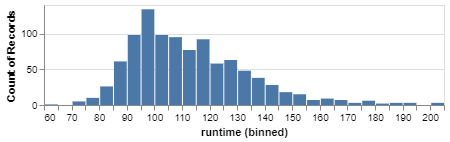

In [9]:
alt.Chart(movies_data).mark_bar().encode(
    x=alt.X('runtime', bin=alt.Bin(maxbins=50)),
    y='count()').properties(height=100)

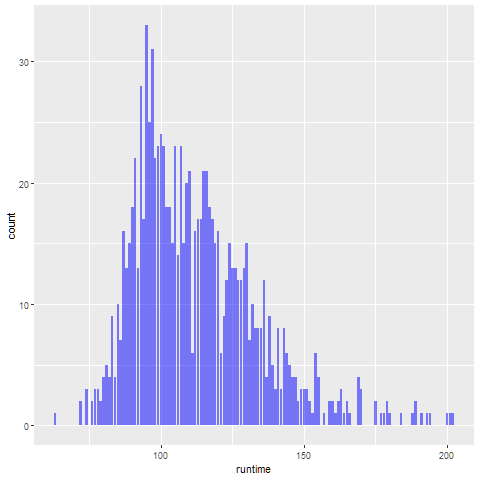

In [12]:
%%R
ggplot(movies, aes(runtime)) +
  geom_bar(alpha = 0.5, fill = "blue", bins = 50)

### Numerical values in Python and R

In [22]:
numeric_cols = movies_data.select_dtypes(include=['float64', 'int64']).drop(columns = 'id').columns.tolist()
numeric_cols

['runtime', 'budget', 'revenue', 'vote_average', 'vote_count']

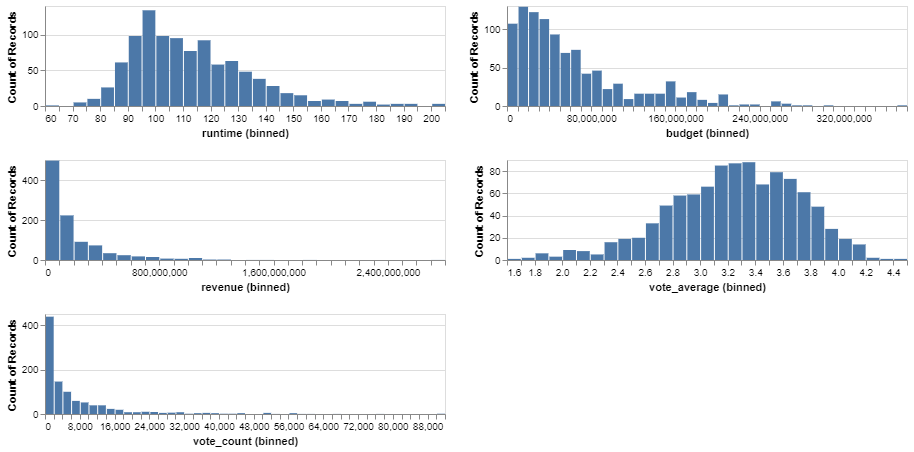

In [23]:
alt.Chart(movies_data).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=50)),
    y = 'count()').properties(height=100).repeat(repeat = numeric_cols, columns=2)

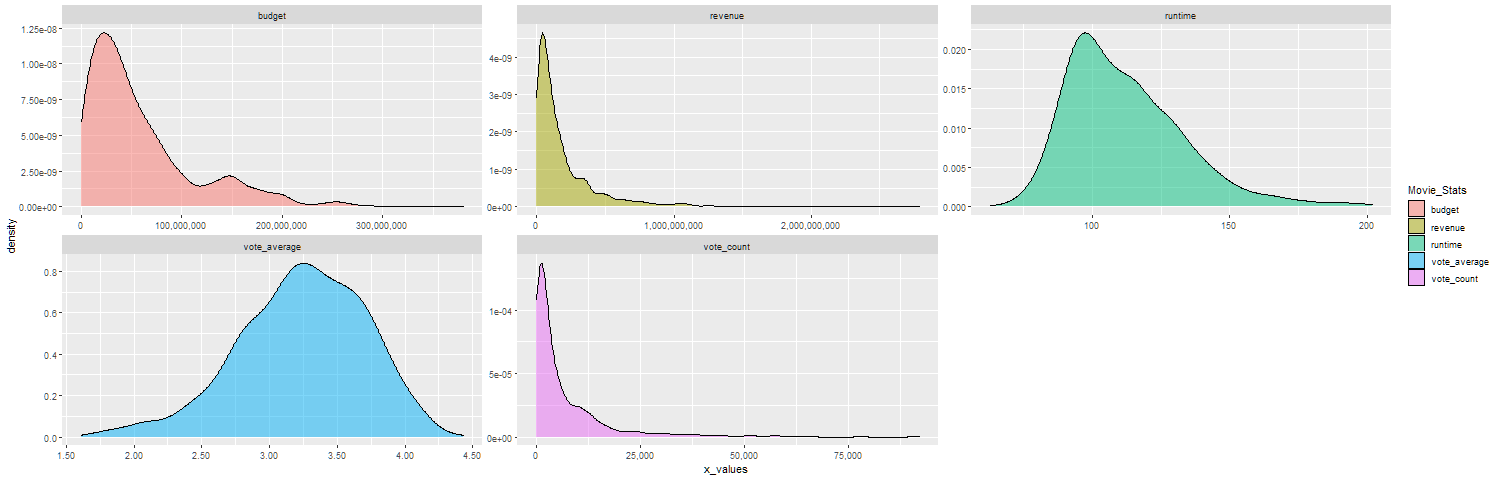

In [24]:
%%R -w 1500
q1_6_r <- dplyr::select_if(movies, is.numeric) %>% select(-id)
q1_6_r

q1_6_r %>%
    gather("Movie_Stats", "x_values") %>%
    ggplot(aes(x=x_values, fill = Movie_Stats)) +
        geom_density(alpha = 0.5) +
             scale_x_continuous(labels = scales::comma) +
        facet_wrap(~Movie_Stats, scale = "free", nrow = 2)

# Pairwise numerical columns in Python and R

In [25]:
q2_1_py = movies_data.select_dtypes(include=['float64', 'int64']).drop(columns = 'id')
#q2_1_py

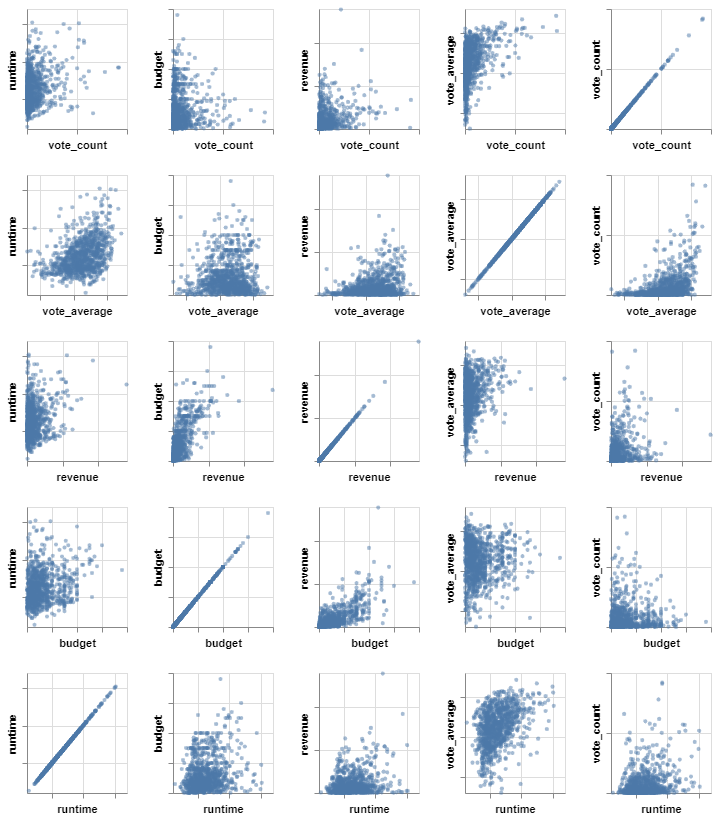

In [26]:
alt.Chart(movies_data).mark_point(opacity = 0.5, size = 5).encode(
    alt.X(alt.repeat("row"), type="quantitative", scale=alt.Scale(zero=False)),
    alt.Y(alt.repeat("column"), type="quantitative", scale=alt.Scale(zero=False))
).properties(width = 100, height=120
).repeat(column = q1_5_py, row = q1_5_py[::-1]).configure_axis(labels = False)

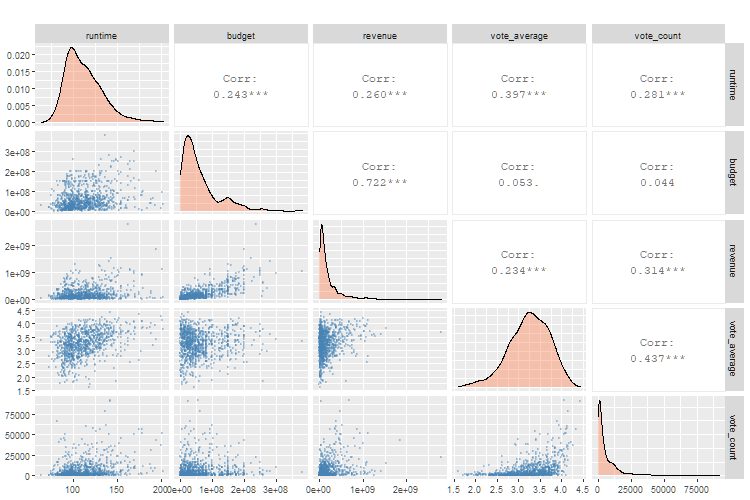

In [27]:
%%R -w 750 -h 500

library(GGally)
q_2_2_r <- select_if(movies, is.numeric) %>% select(-id)

ggpairs(q_2_2_r, columns = 1:ncol(q_2_2_r), title = "",  
  axisLabels = "show", columnLabels = colnames(q_2_2_r[]), 
        progress = FALSE,
        lower = list(continuous = GGally::wrap('points', alpha = 0.3, size=0.1, color = 'steelblue')),
        diag = list(continuous = GGally::wrap('densityDiag', fill = 'coral', alpha = 0.4)))

## Correlation Graphs in Python and R 

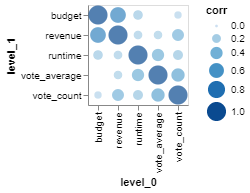

In [31]:
corr_df = movies_data[numeric_cols].corr('spearman').stack().reset_index(name='corr')
alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='corr',
    color='corr')

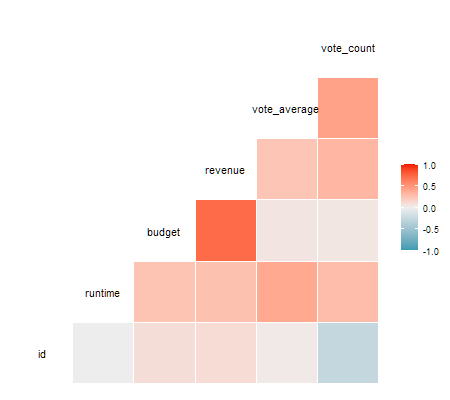

In [42]:
%%R -w 450 -h 400
GGally::ggcorr(movies)

# EDA of numerical columns conditioned on Genres column in both Python and R

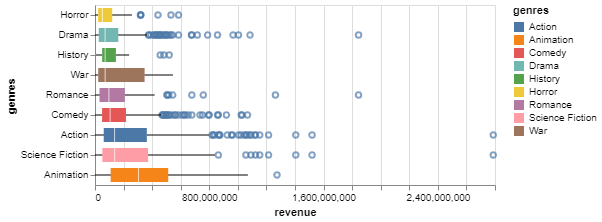

In [46]:
boom_genres = movies_data.explode('genres')
# Sorting by revenue because it is all about the money, money, money...
genres_by_revenue = boom_genres.groupby('genres')['revenue'].median().sort_values().index.tolist()

alt.Chart(boom_genres).mark_boxplot().encode(
    x=alt.X('revenue'),
    y=alt.Y('genres', sort = genres_by_revenue),
    tooltip='title',
    color = "genres")

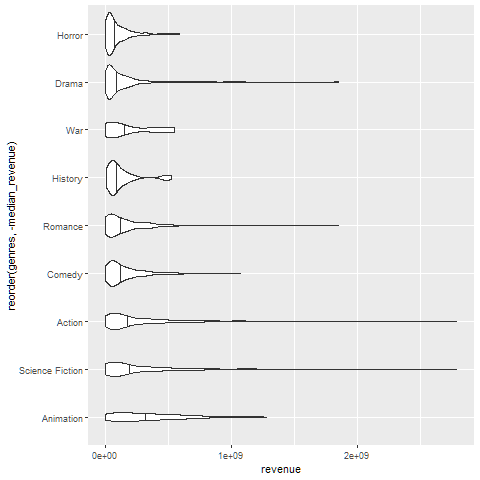

In [47]:
%%R
free_genres <- movies %>% unnest(genres)
free_genres <- free_genres %>%
    group_by(genres) %>%
    mutate(median_revenue = median(revenue, na.rm = TRUE))

ggplot(free_genres, aes(x = revenue, y = reorder(genres, -median_revenue))) +
    geom_violin(draw_quantiles = 0.5)

### EDA of numerical columns conditioned on all categorical columns in both Python and R

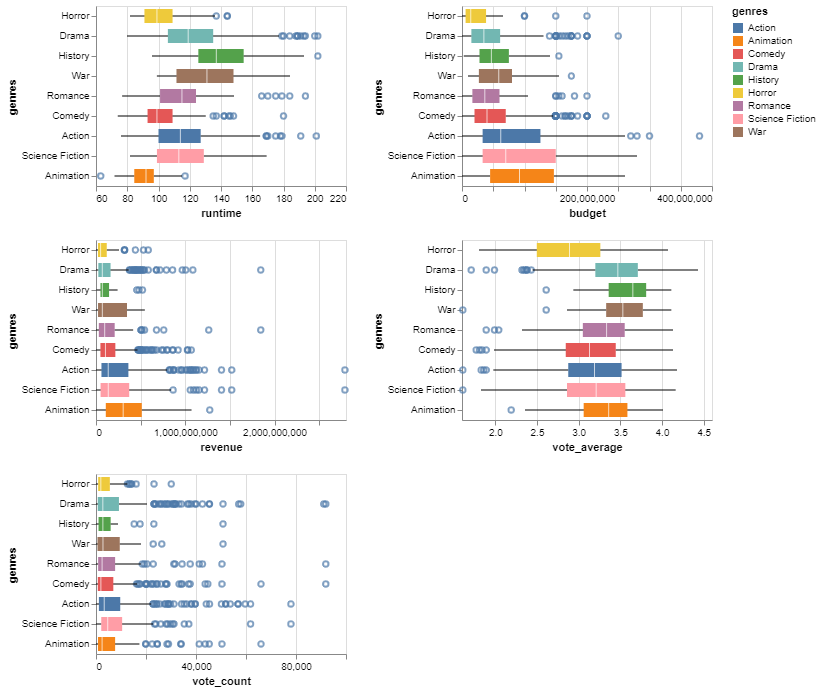

In [48]:
boom_genres = movies_data.explode('genres')
q3_3_col = movies_data.select_dtypes(include=['float64', 'int64']).drop(columns = 'id').columns.tolist()
genres_by_revenue = boom_genres.groupby('genres')['revenue'].median().sort_values().index.tolist()

alt.Chart(boom_genres).mark_boxplot().encode(
    x=alt.X(alt.repeat("repeat"), type="quantitative", scale=alt.Scale(zero=False)),
    y=alt.Y("genres", sort=genres_by_revenue),
    color="genres",
    tooltip="title",
).properties(width=250).repeat(repeat=q3_3_col, columns=2)

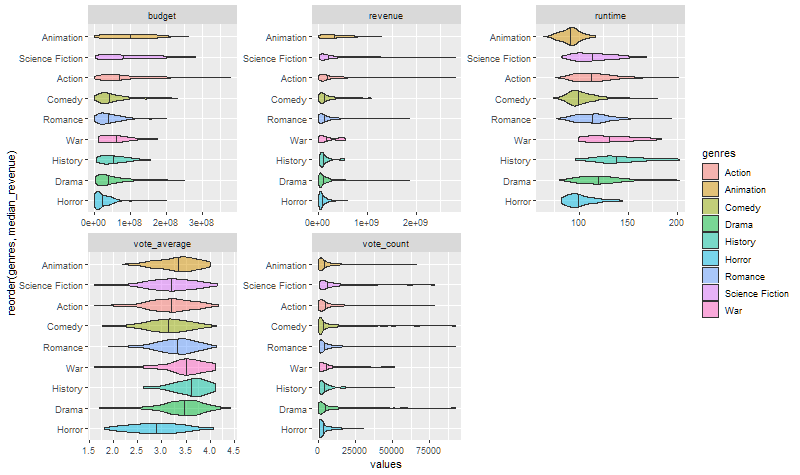

In [49]:
%%R -w 800 -h 475

free_genres2 <- movies %>% unnest(genres) %>%
    group_by(genres) %>%
    mutate(median_revenue = median(revenue, na.rm = TRUE)) %>%
    select_if(is.numeric) %>%
    select(!id) %>%
    pivot_longer(!c(genres, median_revenue), names_to = "names", values_to ="values")
    
ggplot(free_genres2, aes(x = values, y = reorder(genres, median_revenue), fill = genres)) +
    geom_violin(draw_quantiles = 0.5, alpha = 0.5) +
    facet_wrap(~names, scales= "free")

# EDA of categorical columns

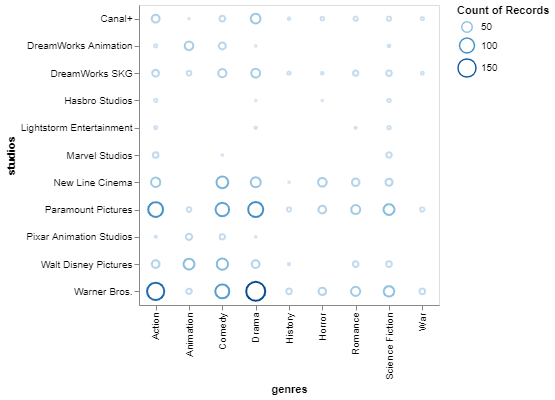

In [50]:
boom_genres_4_1 = movies_data.explode('genres').explode('studios')
boom_genres_4_1

alt.Chart(boom_genres_4_1).mark_point().encode(
alt.X('genres'),
alt.Y('studios'),
    color='count()',
    size='count()').properties(height = 300, width = 300)

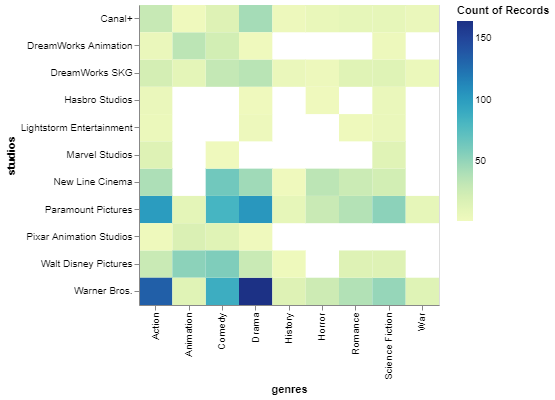

In [51]:
alt.Chart(boom_genres_4_1).mark_rect().encode(
alt.X('genres'),
alt.Y('studios'),
    color='count()',
    size='count()').properties(height = 300, width = 300)

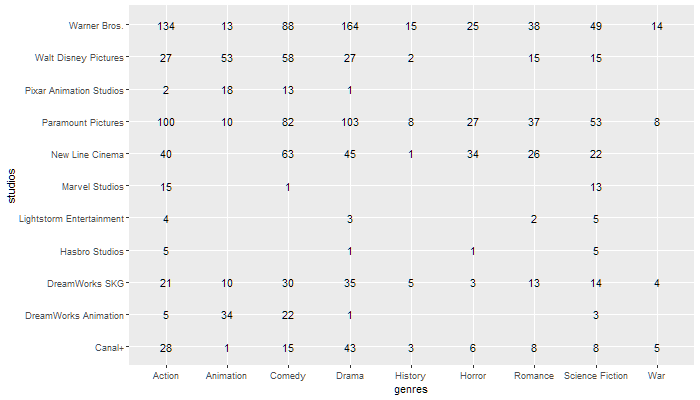

In [28]:
%%R -w 700 -h 400

count_genre_4_2 <- free_genres %>%
select(genres, studios) %>%
add_count(genres, studios, name = "n") %>%
unnest()
#HAVE TO UNNEST THE STUDIOS

ggally_table(count_genre_4_2, aes(x = genres, y = studios))

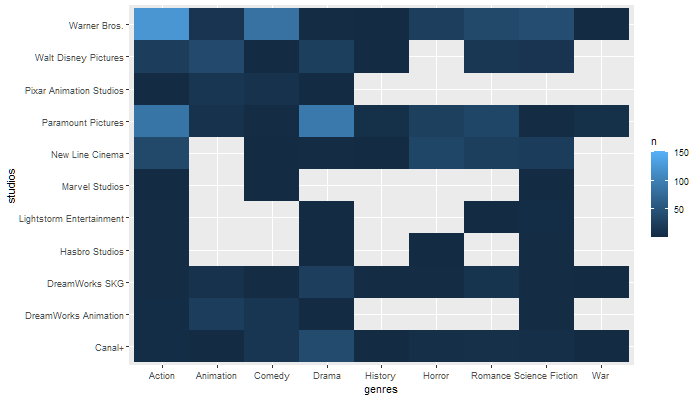

In [29]:
%%R -w 700 -h 400
ggplot(count_genre_4_2, aes(x = genres, y = studios)) +
        geom_tile(aes(fill = n))